## Problem Statement - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv(r"C:\Users\k.udaya shree\Downloads\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()# there are no missing values in the data so it is a clean data 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariate Analysis

C:\Users\k.udaya shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


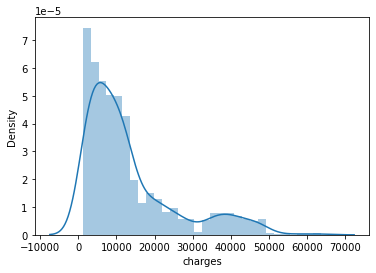

In [7]:
sns.distplot(df['charges']);

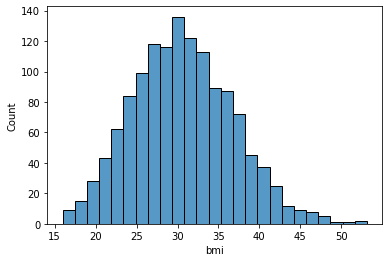

In [8]:
sns.histplot(df['bmi']);

C:\Users\k.udaya shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


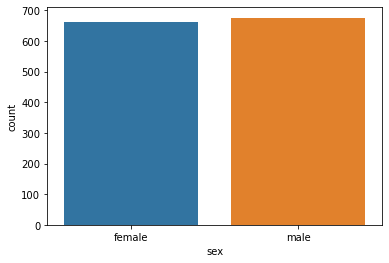

In [9]:
sns.countplot(df['sex'])
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

C:\Users\k.udaya shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


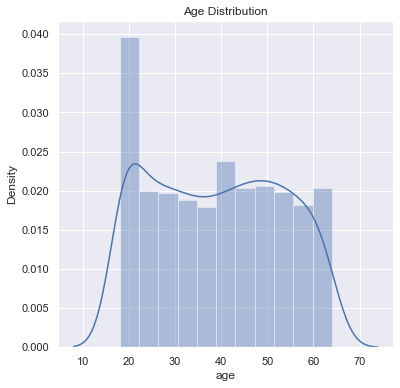

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

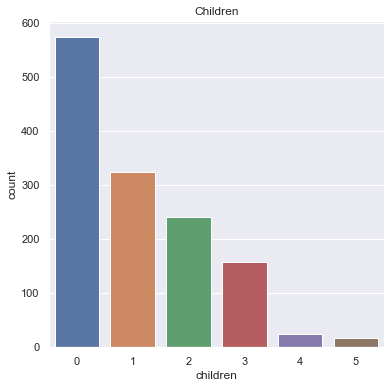

In [11]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

## Bivariate analysis

<AxesSubplot:xlabel='sex', ylabel='charges'>

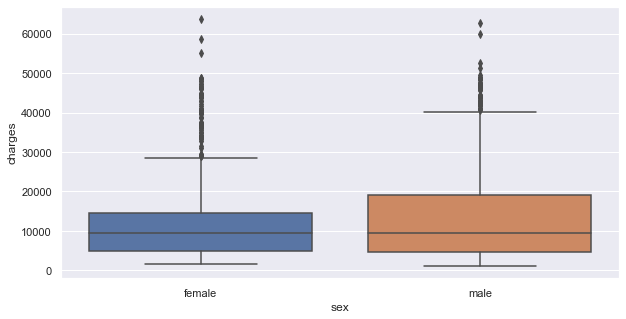

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges',x='sex',data=df.sort_values('charges',ascending=False))

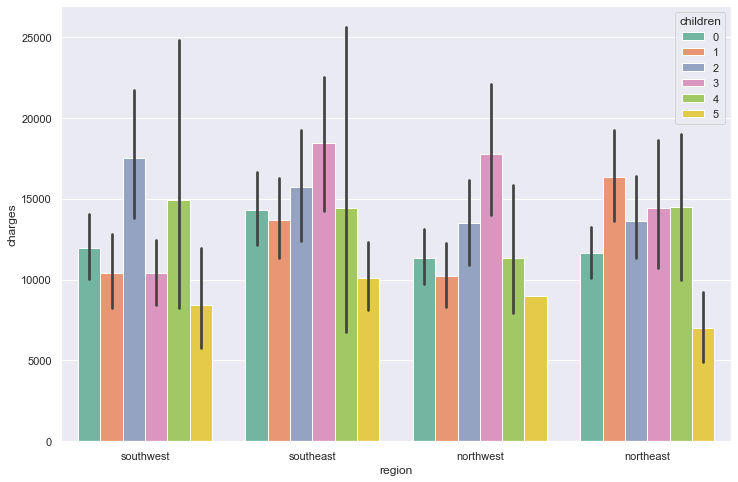

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')

+ we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. 
+ People in the Southwest generally smoke more than people in the Northeast, but 
+ people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. 
+ And people with children tend to have higher medical costs overall as well

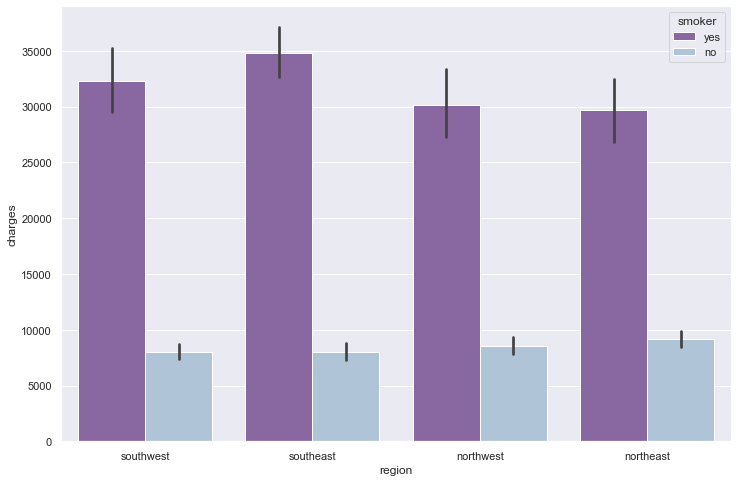

In [14]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

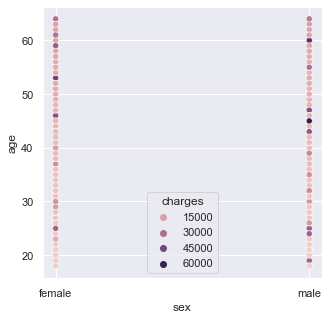

In [15]:
sns.scatterplot(data=df,x=df['sex'],y=df['age'],hue=df['charges'])
plt.show()

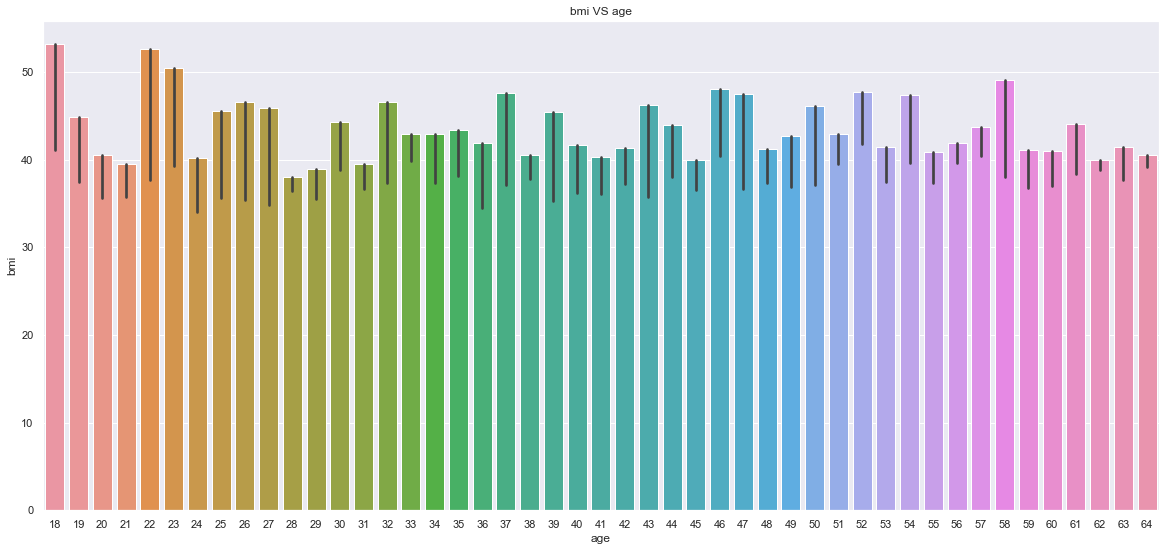

In [16]:
size = (20, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('bmi VS age')
sns.barplot(data=df,x=df['age'], y=df['bmi'], estimator=np.max)
plt.show()

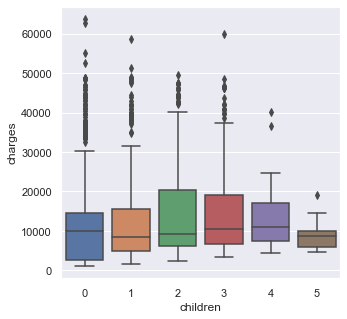

In [17]:
sns.boxplot(x='children', y='charges', data =df )
plt.show()

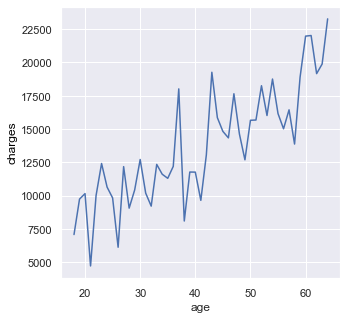

In [18]:
df.groupby(["age"])["charges"].mean().plot.line()
plt.ylabel('charges', fontdict={'fontsize':12, 'color':'black'})
plt.show()

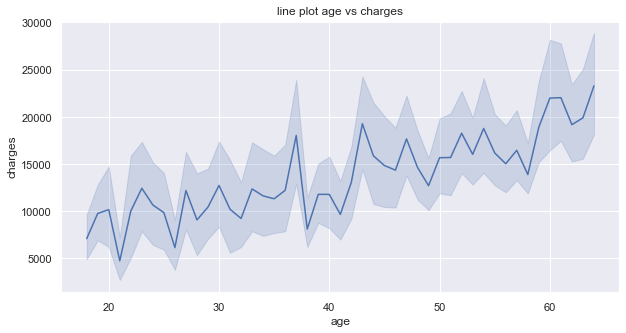

In [19]:
f = plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'], y=df['charges'],)
plt.title('line plot age vs charges')
plt.show()

In [20]:
# select smokers 
smokers = df[df.smoker == "yes"]

# select non smokers
non_smokers = df[df.smoker == "no"]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

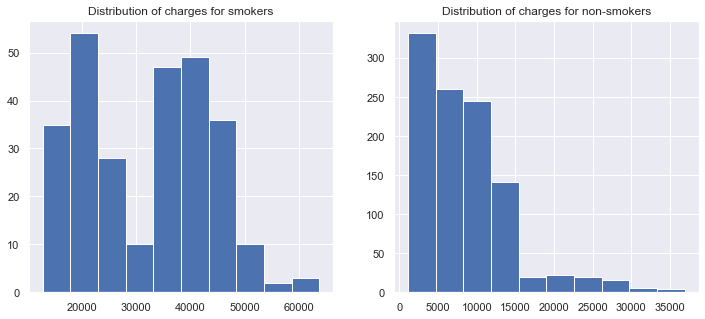

In [21]:
fig = plt.figure(figsize=(12,5))

# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers['charges'])
# set sub plot title
ax.set_title('Distribution of charges for smokers')

# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(non_smokers['charges'])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers')

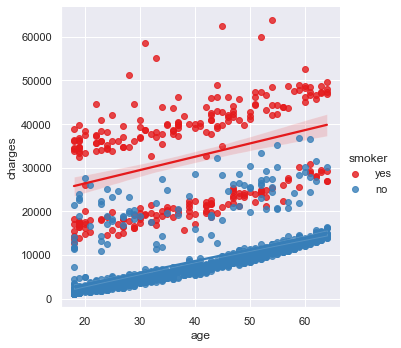

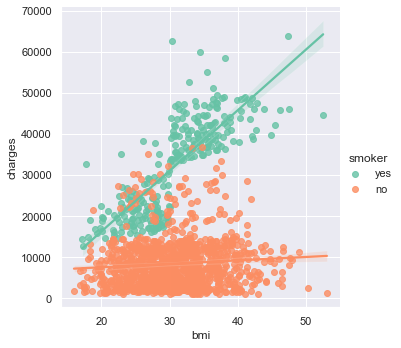

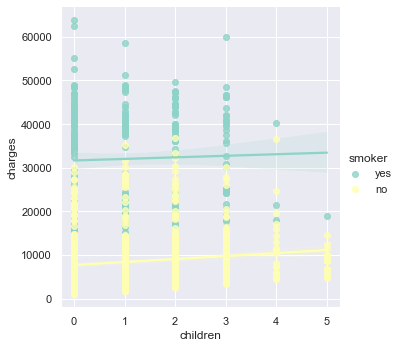

In [22]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

+ Smoking has the highest impact on medical costs, 
+ even though the costs are growing with age, bmi and children.
+ Also people who have children generally smoke less, which the following violinplots shows too

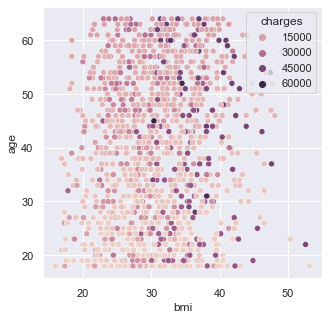

In [23]:
sns.scatterplot(data=df,x=df['bmi'],y=df['age'],hue=df['charges'])
plt.show()

## Multivariate analysis

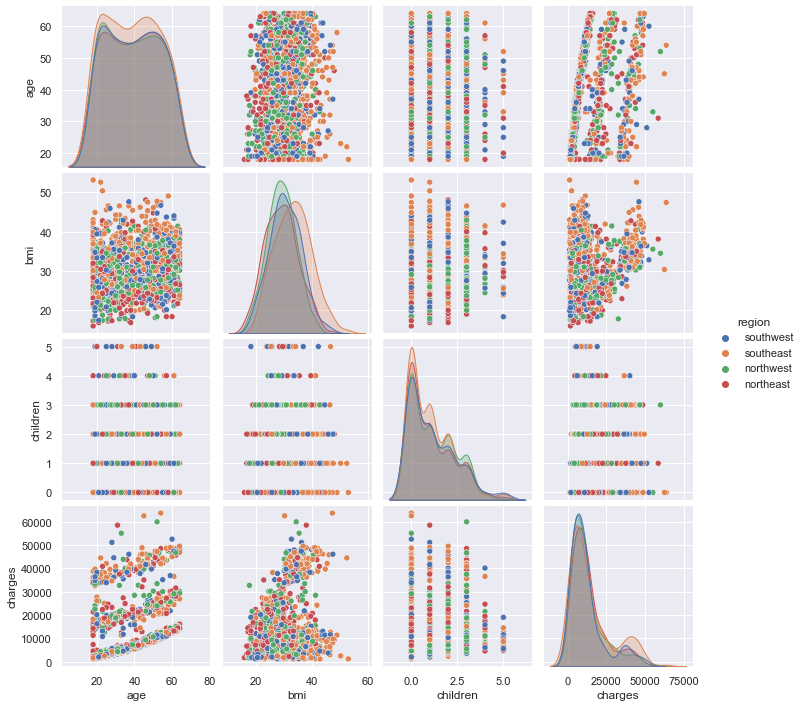

In [24]:
sns.pairplot(df,hue='region')
plt.show()

Text(0.5, 1.0, 'Smoker Percentage Distribution Chart')

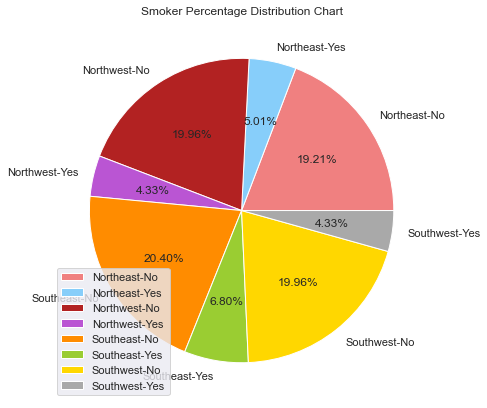

In [25]:
label = ['Northeast-No','Northeast-Yes','Northwest-No','Northwest-Yes','Southeast-No','Southeast-Yes', 'Southwest-No','Southwest-Yes']
colors = ['lightcoral','lightskyblue','firebrick','mediumorchid','darkorange','yellowgreen','gold','darkgrey']

plt.figure(figsize=(12,7))
plt.pie(x=df['smoker'].groupby(df['region']).value_counts(),labels=label, autopct='%.2f%%', colors=colors)
plt.legend(loc='lower left')
plt.title('Smoker Percentage Distribution Chart')

C:\Users\k.udaya shree\AppData\Local\Temp\ipykernel_7860\4104764594.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

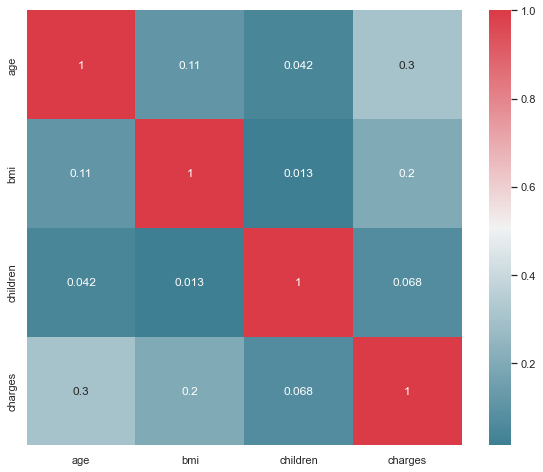

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

### 

In [27]:
x=df.corr()

In [28]:
x

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## Splitting the data into Train and test

In [29]:
y=df['charges']
X=df[['age','sex','bmi','children','smoker','region']]

In [57]:
# By using Train test split from sklearn library the total data is segregated into 4 parts
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1003, 6) (335, 6)
(1003,) (335,)


In [58]:
X_train.head()

,age,sex,bmi,children,smoker,region
1075,32,female,29.59,1,no,southeast
131,61,female,22.04,0,no,northeast
15,19,male,24.60,1,no,southwest
1223,20,female,24.42,0,yes,southeast
1137,26,female,22.23,0,no,northwest


In [59]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

# Separating categorical and numerical varibales

In [60]:
X_train_cat =X_train.select_dtypes(include=('object'))
X_train_cat.head()

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest


## Separating numerical variables

In [61]:
X_train_num=X_train.select_dtypes(include=('int64','float64'))
X_train_num

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0
...,...,...,...
763,27,26.03,0
835,42,35.97,2
1216,40,25.08,0
559,19,35.53,0


# Scaling the numerical data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

X_train_rescaled.head()


,age,bmi,children
1075,-0.514853,-0.181331,-0.063607
131,1.548746,-1.393130,-0.892144
15,-1.439915,-0.982242,-0.063607
1223,-1.368757,-1.011133,-0.892144
1137,-0.941805,-1.362635,-0.892144


In [63]:
X_train_num.describe()

,age,bmi,children
count,1003.000000,1003.000000,1003.000000
mean,39.235294,30.719766,1.076770
std,14.060124,6.233512,1.207548
min,18.000000,15.960000,0.000000
25%,26.500000,26.302500,0.000000
50%,39.000000,30.300000,1.000000
75%,51.000000,34.800000,2.000000
max,64.000000,53.130000,5.000000


In [64]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.23529412 30.7197657   1.07676969]
Std of each column: [14.05311355  6.23040428  1.20694597]


# Applying labelEncoding on Categorical Columns

In [65]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.507478
male      0.492522
Name: sex, dtype: float64

In [66]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.797607
yes    0.202393
Name: smoker, dtype: float64

In [67]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.275174
southwest    0.260219
northwest    0.237288
northeast    0.227318
Name: region, dtype: float64

In [68]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
1075
131
15
1223
1137


In [69]:
X_train_cat.sex.unique()

array(['female', 'male'], dtype=object)

In [70]:
sex_encoder = {'male' : 1, 'female' : 2}

X_train_cat_le['sex'] = X_train_cat['sex'].apply(lambda x : sex_encoder[x])

X_train_cat_le.head()

,sex
1075,2
131,2
15,1
1223,2
1137,2


In [71]:
X_train_cat.smoker.unique()

array(['no', 'yes'], dtype=object)

In [72]:
smoker_encoder = {'yes' : 1, 'no' : 2}

X_train_cat_le['smoker'] = X_train_cat['smoker'].apply(lambda x : smoker_encoder[x])

X_train_cat_le.head()

,sex,smoker
1075,2,2
131,2,2
15,1,2
1223,2,1
1137,2,2


In [73]:
X_train_cat.region.unique()

array(['southeast', 'northeast', 'southwest', 'northwest'], dtype=object)

In [74]:
region_encoder = {'northeast' : 1, 'southwest' : 2,'southeast':3,'northwest':4}

X_train_cat_le['region'] = X_train_cat['region'].apply(lambda x : region_encoder[x])

X_train_cat_le.head()

,sex,smoker,region
1075,2,2,3
131,2,2,1
15,1,2,2
1223,2,1,3
1137,2,2,4


In [75]:
X_train_transformed = pd.concat([X_train_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
1075,-0.514853,-0.181331,-0.063607,2,2,3
131,1.548746,-1.393130,-0.892144,2,2,1
15,-1.439915,-0.982242,-0.063607,1,2,2
1223,-1.368757,-1.011133,-0.892144,2,1,3
1137,-0.941805,-1.362635,-0.892144,2,2,4


## 

In [76]:
X_test.head()

,age,sex,bmi,children,smoker,region
578,52,male,30.200,1,no,southwest
610,47,female,29.370,1,no,southeast
569,48,male,40.565,2,yes,northwest
1034,61,male,38.380,0,no,northwest
198,51,female,18.050,0,no,northwest


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 578 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [78]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
578,male,no,southwest
610,female,no,southeast
569,male,yes,northwest
1034,male,no,northwest
198,female,no,northwest


In [79]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
578,52,30.200,1
610,47,29.370,1
569,48,40.565,2
1034,61,38.380,0
198,51,18.050,0


In [84]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
578,0.908319,-0.083424,-0.063607
610,0.552526,-0.216642,-0.063607
569,0.623684,1.580192,0.764931
1034,1.548746,1.229492,-0.892144
198,0.837160,-2.033538,-0.892144


In [85]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
578
610
569
1034
198


In [86]:
X_test_cat_le['sex'] = X_test_cat['sex'].apply(lambda x : sex_encoder[x])

X_test_cat_le['smoker'] = X_test_cat['smoker'].apply(lambda x : smoker_encoder[x])

X_test_cat_le['region'] = X_test_cat['region'].apply(lambda x : region_encoder[x])

X_test_cat_le.head()

,sex,smoker,region
578,1,2,2
610,2,2,3
569,1,1,4
1034,1,2,4
198,2,2,4


In [87]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
578,0.908319,-0.083424,-0.063607,1,2,2
610,0.552526,-0.216642,-0.063607,2,2,3
569,0.623684,1.580192,0.764931,1,1,4
1034,1.548746,1.229492,-0.892144,1,2,4
198,0.837160,-2.033538,-0.892144,2,2,4


# Linear regression

In [111]:
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
linear.fit(X_train_transformed,y_train)

LinearRegression()

In [112]:
y_test_pred = linear.predict(X_test_transformed)

In [94]:
import sklearn.metrics as metrics

In [113]:
linear_mae = metrics.mean_absolute_error(y_test, y_test_pred)
linear_mae

3981.503332182683

In [114]:
linear_mse = metrics.mean_squared_error(y_test, y_test_pred)
linear_mse

32205477.744666018

In [115]:
linear_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
linear_rmse

5674.9870259469335

In [100]:
temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp.head()

,Actual,Predicted
578,9724.53000,11492.249842
610,8547.69130,9890.298079
569,45702.02235,37667.855427
1034,12950.07120,15750.779253
198,9644.25250,6824.610603


<AxesSubplot:xlabel='charges', ylabel='Count'>

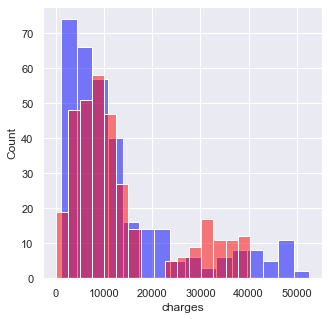

In [101]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# KNN regression

In [118]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [119]:
y_test_pred = knn.predict(X_test_transformed)

In [120]:
knn_mae = metrics.mean_absolute_error(y_test, y_test_pred)
knn_mae

4067.9128332626865

In [121]:
knn_mse = metrics.mean_squared_error(y_test, y_test_pred)
knn_mse

41286654.93129483

In [122]:
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
knn_rmse

6425.469238218702

In [123]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,8433.60440
610,8547.69130,7948.16022
569,45702.02235,38085.82661
1034,12950.07120,11707.79940
198,9644.25250,9912.42578


<AxesSubplot:xlabel='charges', ylabel='Count'>

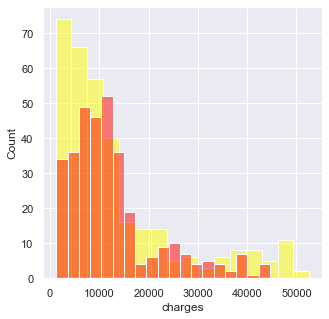

In [124]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# Decision tree regression

In [141]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [142]:
y_test_pred = dt.predict(X_test_transformed)

In [143]:
dt_mae = metrics.mean_absolute_error(y_test, y_test_pred)
dt_mae

3127.5607026537314

In [144]:
dt_mse = metrics.mean_squared_error(y_test, y_test_pred)
dt_mse

45412378.536815606

In [145]:
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
dt_rmse

6738.870716731076

In [146]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10085.84600
610,8547.69130,8930.93455
569,45702.02235,44202.65360
1034,12950.07120,13429.03540
198,9644.25250,9855.13140


<AxesSubplot:xlabel='charges', ylabel='Count'>

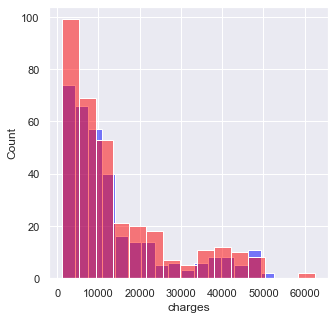

In [147]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# Support vector regressor

In [148]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed, y_train)

SVR()

In [149]:
y_test_pred = dt.predict(X_test_transformed)

In [150]:
svr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
svr_mae

3127.5607026537314

In [151]:
svr_mse = metrics.mean_squared_error(y_test, y_test_pred)
svr_mse

45412378.536815606

In [152]:
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
svr_rmse

6738.870716731076

In [153]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10085.84600
610,8547.69130,8930.93455
569,45702.02235,44202.65360
1034,12950.07120,13429.03540
198,9644.25250,9855.13140


<AxesSubplot:xlabel='charges', ylabel='Count'>

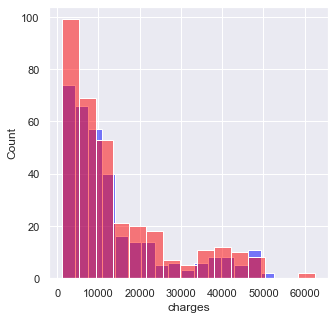

In [154]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

#  Random forest regression

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [126]:
y_test_pred = rf.predict(X_test_transformed)

In [128]:
rf_mae = metrics.mean_absolute_error(y_test, y_test_pred)
rf_mae

2690.5559579418905

In [129]:
rf_mse = metrics.mean_squared_error(y_test, y_test_pred)
rf_mse

19652839.28393562

In [130]:
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rf_rmse

4433.152296496887

In [131]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10242.701234
610,8547.69130,10022.742318
569,45702.02235,45315.770988
1034,12950.07120,12986.366331
198,9644.25250,9882.941725


<AxesSubplot:xlabel='charges', ylabel='Count'>

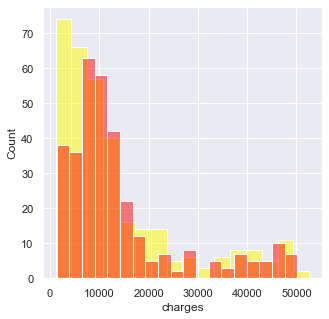

In [132]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# Gradient Boosting Descison Tree Regression

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [134]:
y_test_pred = gbr.predict(X_test_transformed)

In [136]:
gbr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
gbr_mae

2412.046798343853

In [137]:
gbr_mse = metrics.mean_squared_error(y_test, y_test_pred)
gbr_mse

16067587.090138866

In [138]:
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
gbr_rmse

4008.4394831578616

In [139]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,12629.962369
610,8547.69130,9749.894774
569,45702.02235,46460.217380
1034,12950.07120,13791.305097
198,9644.25250,11362.282950


<AxesSubplot:xlabel='charges', ylabel='Count'>

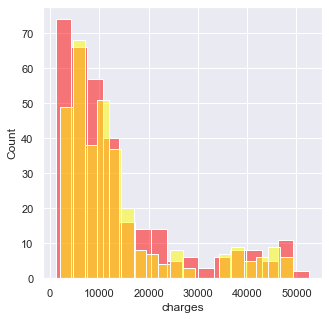

In [140]:
sns.histplot(y_test, color='red', alpha=0.5)
sns.histplot(y_test_pred, color='yellow', alpha=0.5)

In [155]:
models = [('Linear Regression',linear_mae,linear_mse,linear_rmse),
          ('KNN Regression',knn_mae,knn_mse,knn_rmse),
          ('Decision Tree Regression',dt_mae,dt_mse,dt_rmse),
          ('Support Vector Regression',svr_mae,svr_mse,svr_rmse),
          ('Random Forest Regression',rf_mae,rf_mse,rf_rmse),
          ('Gradient Boosting Regression',gbr_mae,gbr_mse,gbr_rmse)]

In [156]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Mean absolute error','Mean squared error','Root mean squared error'])
predict

,Algorithm,Mean absolute error,Mean squared error,Root mean squared error
0,Linear Regression,3981.503332,3.220548e+07,5674.987026
1,KNN Regression,4067.912833,4.128665e+07,6425.469238
2,Decision Tree Regression,3127.560703,4.541238e+07,6738.870717
3,Support Vector Regression,3127.560703,4.541238e+07,6738.870717
4,Random Forest Regression,2690.555958,1.965284e+07,4433.152296
5,Gradient Boosting Regression,2412.046798,1.606759e+07,4008.439483


## Observation 

By using gradient boosting descision tree regression we get the least 'mean absolute error'. So Gradient boosting descision tree regression is the best algorithm for the model.